###Phase 5: Model Validation & Selection

Step 1: Imported Libraries and loaded the dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

data = load_breast_cancer()
X = data.data
y = data.target

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (569, 30)
Target shape: (569,)


Step 2:Apply K-Fold Cross-Validation

In [ ]:
model = RandomForestClassifier(random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard Deviation: {:.4f}".format(cv_scores.std()))

Cross-Validation Scores: [0.95614035 0.96491228 0.93859649 0.96491228 0.96460177]
Mean Accuracy: 0.9578
Standard Deviation: 0.0102


Step 3: Plot the Learning Curve

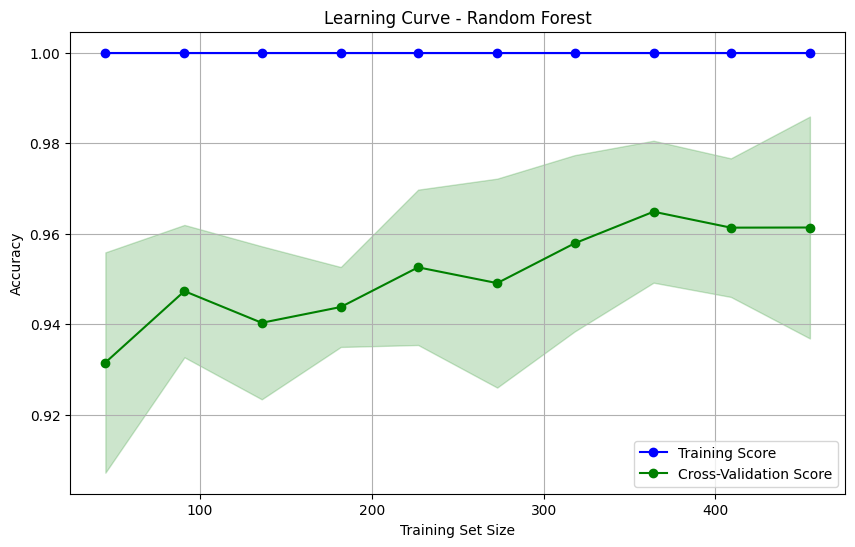

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=RandomForestClassifier(random_state=42),X=X,y=y,cv=5,train_sizes=np.linspace(0.1, 1.0, 10),scoring='accuracy',shuffle=True,random_state=42)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-Validation Score')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.2, color='green')
plt.title('Learning Curve - Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

###Summary:

Explored model validation techniques using a **Random Forest Classifier** on the **Breast Cancer dataset**. Applied **5-Fold Cross-Validation** using KFold and cross_val_score, which produced the following accuracy scores across folds:

- **Cross-Validation Scores**: [0.95614035, 0.96491228, 0.93859649, 0.96491228, 0.96460177]  
- **Mean Accuracy**: 0.9578  
- **Standard Deviation**: 0.0102  

These results indicate consistent model performance with low variance. A **learning curve** was also plotted using learning_curve to visualize training and validation performance across varying training sizes.

From the learning curve, Observed that the training accuracy remained consistently high, while the validation accuracy improved and then leveled off, maintaining a small and steady gap. This behavior suggests **mild overfitting**, where the model fits the training data very well but still generalizes effectively to unseen data. There were no signs of underfitting, as the model performed reliably across different training sizes.

This phase helped to understand concepts such as the **bias-variance tradeoff**, **overfitting vs underfitting**, and how tools like **cross-validation and learning curves** can be used to evaluate and improve a model’s generalization performance.
